<a href="https://colab.research.google.com/github/AnnKulyk/Python/blob/main/%D0%B4_%D0%B7_%22HW2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


<Axes: title={'center': 'Середня кількість оренд'}, xlabel='Місяць', ylabel='Кількість оренд'>

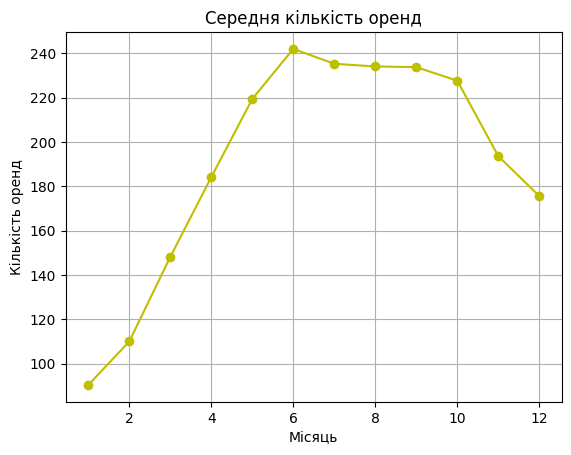

In [20]:
month_count=df.groupby('month')['count'].mean()
month_count.plot( marker='o',
                 color='y',
                  ylabel='Кількість оренд',
                  xlabel='Місяць',
                  title='Середня кількість оренд',
                  grid=True
)

/tmp/ipython-input-31-3946024628.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_count=df['count'].resample('M').mean()


<Axes: title={'center': 'Середня кількість оренд'}, xlabel='Місяць', ylabel='Кількість оренд'>

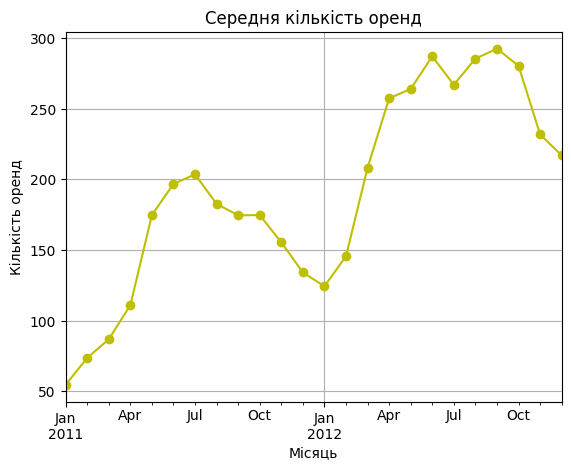

In [31]:
month_count=df['count'].resample('M').mean()
month_count.plot( marker='o',
                 color='y',
                  ylabel='Кількість оренд',
                  xlabel='Місяць',
                  title='Середня кількість оренд',
                  grid=True
)

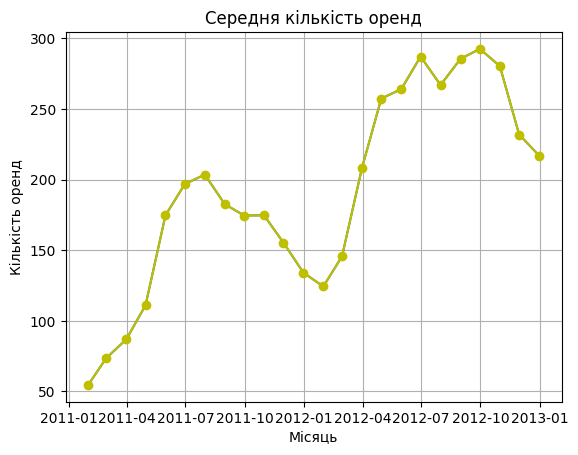

In [43]:
plt.plot(month_count)
plt.plot(month_count.index, month_count.values,'o-y')
plt.grid(True)
plt.ylabel('Кількість оренд')
plt.xlabel('Місяць')
plt.title('Середня кількість оренд');


з пандас швидше і простіше будувати графіки, менше часу на написання коду і більш деталізовано вийшла вісь х

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [45]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

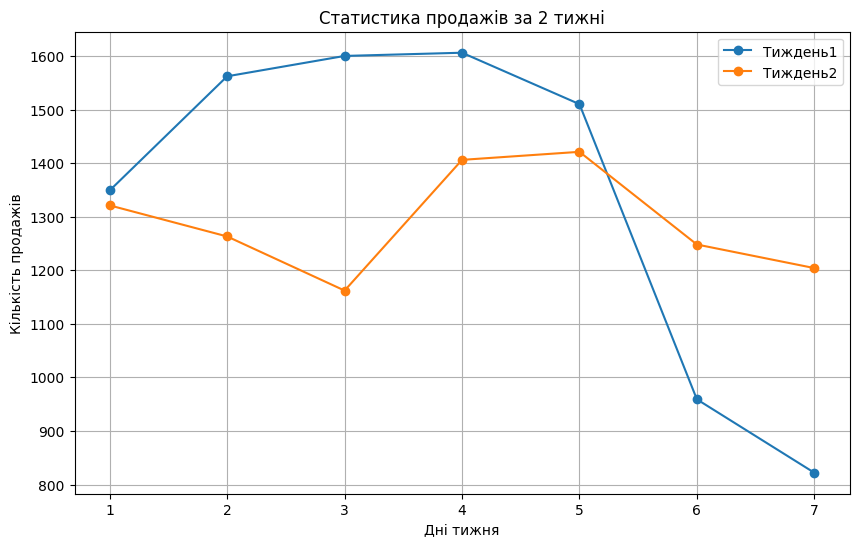

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(days, sales_week1, marker="o", label="Тиждень1")
plt.plot(days, sales_week2, marker="o", label="Тиждень2")
plt.title('Статистика продажів за 2 тижні')
plt.ylabel('Кількість продажів')
plt.xlabel('Дні тижня')
plt.grid(True)
plt.legend()
plt.show()

оренда в тижні 2 була більш стабільною. До кінця першого тижня спостерігається значний спад, можливо погіршились погодні умови.

In [52]:
import numpy as np

std_w1 = np.std(sales_week1)
std_w2 = np.std(sales_week2)

print(f"Стандартне відхилення тиждень 1: {std_w1:.2f}")
print(f"Стандартне відхилення тиждень 2: {std_w2:.2f}")

Стандартне відхилення тиждень 1: 300.00
Стандартне відхилення тиждень 2: 90.91


стандартне відхилення підтверджує, що перший тиджень був стабільнішим

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [55]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


/tmp/ipython-input-58-3141519376.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['temp'].resample('M').mean()


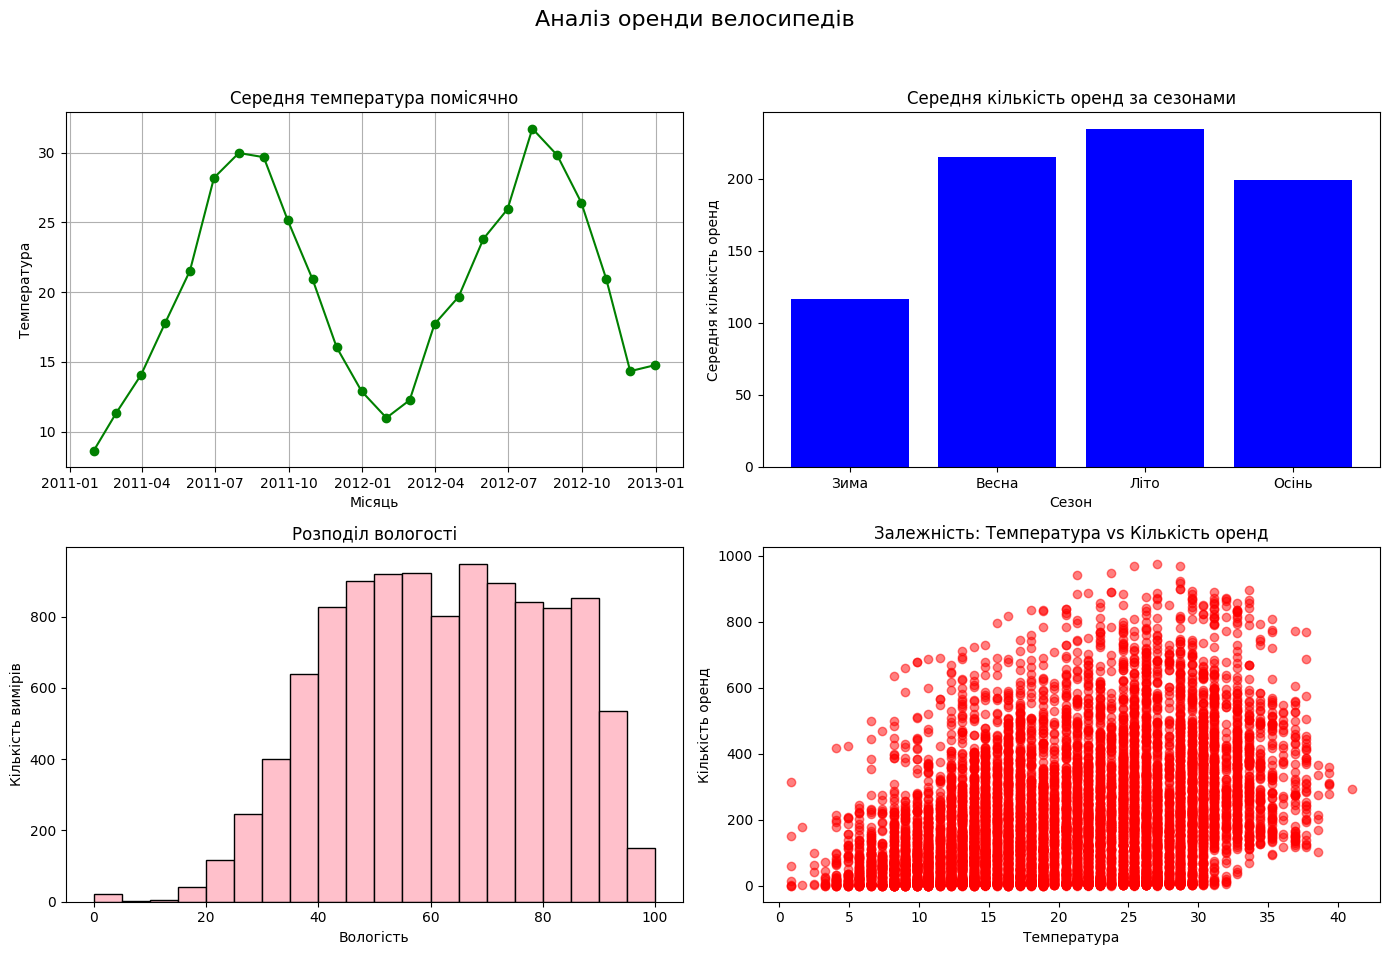

In [58]:
# 1. Середня температура помісячно
monthly_temp = df['temp'].resample('M').mean()

# 2. Середня годинна кількість оренд за сезонами
avg_hourly_by_season = df.groupby('season')['count'].mean()

# 3. Дані для гістограми вологості
humidity_data = df['humidity']

# 4. Scatter plot: temp vs count
x_temp = df['temp']
y_count = df['count']


plt.figure(figsize=(14, 10))
plt.suptitle('Аналіз оренди велосипедів', fontsize=16)

#  1. Лінійний графік температури помісячно
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='green')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')
plt.grid(True)

#  2. Стовпчикова діаграма середньої кількості оренд за сезонами
plt.subplot(2, 2, 2)
season_labels = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
avg_hourly_by_season.index = avg_hourly_by_season.index.map(season_labels)
plt.bar(avg_hourly_by_season.index, avg_hourly_by_season.values, color='blue')
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')

#  3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity_data, bins=20, color='pink', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість вимірів')

#  4. Scatter plot temp vs count
plt.subplot(2, 2, 4)
plt.scatter(x_temp, y_count, alpha=0.5, color='red')
plt.title('Залежність: Температура vs Кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

/tmp/ipython-input-61-3013882167.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['temp'].resample('M').mean()


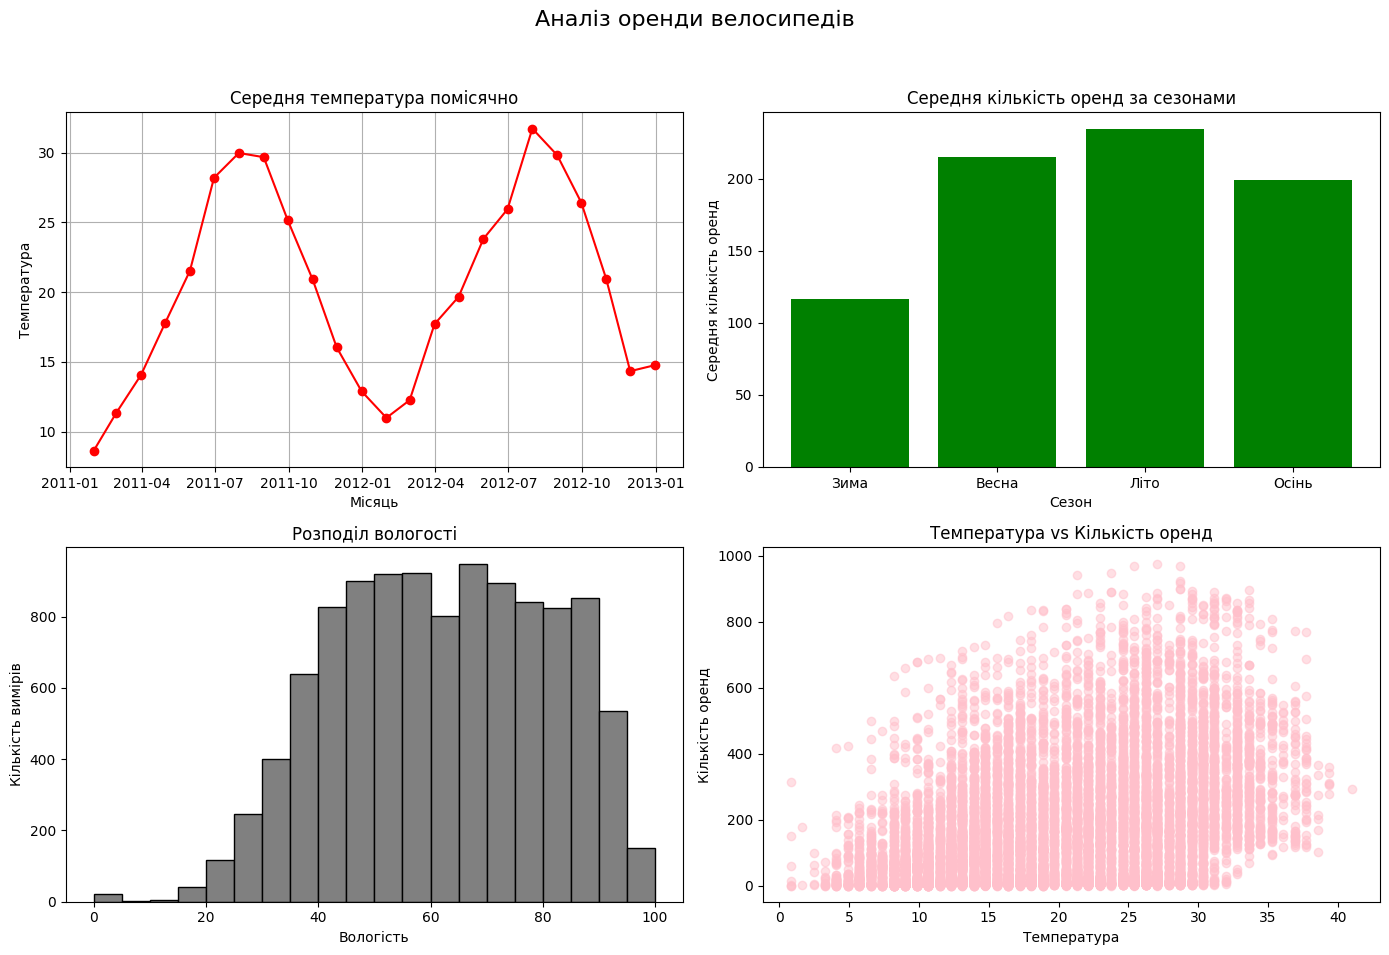

In [61]:
# 1. Середня температура помісячно
monthly_temp = df['temp'].resample('M').mean()

# 2. Середня годинна кількість оренд за сезонами
avg_hourly_by_season = df.groupby('season')['count'].mean()
season_labels = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
avg_hourly_by_season.index = avg_hourly_by_season.index.map(season_labels)

# 3. Вологість
humidity_data = df['humidity']

# 4. Температура vs оренди
x_temp = df['temp']
y_count = df['count']


fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Аналіз оренди велосипедів', fontsize=16)

# 1. Лінійний графік температури
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='red')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура')
ax[0, 0].grid(True)

# 2. Стовпчикова діаграма по сезонах
ax[0, 1].bar(avg_hourly_by_season.index, avg_hourly_by_season.values, color='green')
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Середня кількість оренд')

# 3. Гістограма вологості
ax[1, 0].hist(humidity_data, bins=20, color='grey', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість вимірів')

# 4. Scatter plot
ax[1, 1].scatter(x_temp, y_count, alpha=0.5, color='pink')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.subplots() зручніший для побудови великих дашбордів, з ним легше стилізувати всі графіки.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

/tmp/ipython-input-76-1496492038.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df['count'].resample('M').agg(['mean', 'min', 'max'])


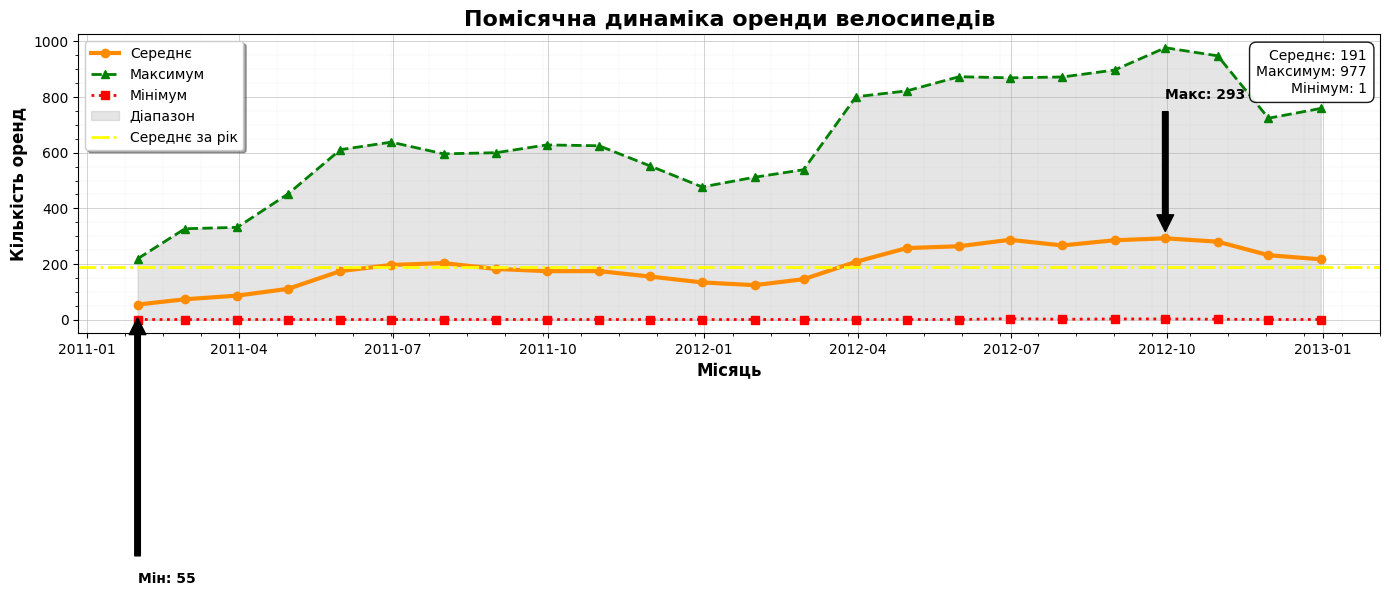

In [76]:

# Групування помісячно
monthly_stats = df['count'].resample('M').agg(['mean', 'min', 'max'])

# Середнє за рік
yearly_avg = monthly_stats['mean'].mean()

# Координати для анотацій
max_month = monthly_stats['mean'].idxmax()
min_month = monthly_stats['mean'].idxmin()
max_value = monthly_stats['mean'].max()
min_value = monthly_stats['mean'].min()

# Побудова графіка
plt.figure(figsize=(14, 10))
plt.plot(monthly_stats.index, monthly_stats['mean'], label='Середнє', color='darkorange',
         linestyle='-', marker='o', linewidth=3)
plt.plot(monthly_stats.index, monthly_stats['max'], label='Максимум', color='green',
         linestyle='--', marker='^', linewidth=2)
plt.plot(monthly_stats.index, monthly_stats['min'], label='Мінімум', color='red',
         linestyle=':', marker='s', linewidth=2)

# Заливка області між min та max
plt.fill_between(monthly_stats.index,
                 monthly_stats['min'],
                 monthly_stats['max'],
                 color='gray', alpha=0.2, label='Діапазон')

# Горизонтальна лінія середнього за рік
plt.axhline(yearly_avg, color='yellow', linestyle='-.', linewidth=2, label='Середнє за рік')

# Анотації для екстремальних значень
plt.annotate(f'Макс: {max_value:.0f}',
             xy=(max_month, max_value),
             xytext=(max_month, max_value + 500),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, fontweight='bold')

plt.annotate(f'Мін: {min_value:.0f}',
             xy=(min_month, min_value),
             xytext=(min_month, min_value - 1000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, fontweight='bold')

# статистикa
stats_text = (
    f"Середнє: {monthly_stats['mean'].mean():.0f}\n"
    f"Максимум: {monthly_stats['max'].max():.0f}\n"
    f"Мінімум: {monthly_stats['min'].min():.0f}"
)
plt.text(0.99, 0.95, stats_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9))

#  легенда
plt.legend(loc='upper left', frameon=True, shadow=True, fontsize=10)


plt.title('Помісячна динаміка оренди велосипедів', fontsize=16, fontweight='bold')
plt.xlabel('Місяць', fontsize=12, fontweight='bold')
plt.ylabel('Кількість оренд', fontsize=12, fontweight='bold')


plt.grid(which='major', linestyle='-', linewidth=0.5, alpha=0.8)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

plt.tight_layout()
plt.show()

 1. анотація дає змогу зосередити увагу на головному, це короткий виклад інформації, яка важлива при аналізі.
 2. за допомогою fill_between() створюється заливка області, це дає змогу візуально виділити бажаний діапазон, покращує читабельність графіку
 3. текстовий блок дає змогу швидко зробити необхідні висновки